In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
#Bring in the main analysis dataset
full = pd.read_stata("data/hall_thompson_replication_files/rd_analysis_hs.dta")
full

,state,dist,dem,year,turnout_dem_strong,low_info_votes1,high_info_votes1,low_info_n1,high_info_n1,turnout_dem_nvstrong,...,re,g,pv,two_party_total,lag_pv,catalist_share,no_party_id,gov_elec,senate_elec,mindonors
0,AK,1.0,1.0,2008.0,0.777778,0.0,7.0,1.0,8.0,0.800000,...,0.0,1.0,0.391753,0.97,0.371134,0.161095,0.0,0.0,1.0,41316.0
1,AL,7.0,1.0,2006.0,0.500000,0.0,0.0,0.0,0.0,0.500000,...,0.0,6.0,0.646465,0.99,0.646465,NaN,1.0,1.0,0.0,500.0
2,AL,2.0,0.0,2008.0,0.600000,1.0,2.0,3.0,2.0,0.333333,...,0.0,2.0,0.636364,0.99,0.670000,NaN,1.0,0.0,1.0,16592.0
3,AL,5.0,1.0,2010.0,0.684211,4.0,8.0,8.0,9.0,0.125000,...,0.0,3.0,0.383838,0.99,0.383838,NaN,1.0,1.0,1.0,5000.0
4,AL,7.0,1.0,2010.0,0.652174,3.0,11.0,7.0,15.0,0.428571,...,0.0,6.0,0.727273,0.99,0.727273,NaN,1.0,1.0,1.0,38000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,WV,2.0,1.0,2006.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,319.0,0.424242,0.99,0.424242,0.513689,0.0,0.0,1.0,1000.0
454,WV,1.0,1.0,2010.0,0.900000,12.0,6.0,13.0,7.0,0.583333,...,0.0,318.0,0.424242,0.99,0.424242,0.493255,0.0,0.0,1.0,49500.0
455,WV,1.0,0.0,2010.0,0.900000,12.0,6.0,13.0,7.0,0.583333,...,0.0,318.0,0.575758,0.99,0.575758,0.377217,0.0,0.0,1.0,9250.0
456,WV,2.0,1.0,2014.0,0.368421,0.0,7.0,4.0,11.0,0.380952,...,0.0,319.0,0.387755,0.98,0.387755,0.441337,0.0,0.0,1.0,1250.0


In [44]:
cd_demo_2015 = pd.read_csv("data/cd_demo_2015.csv", thousands=',')
cd_demo_2015

,District,State,Hispanic,White,Black,AmericanIndian,Asian,PacificIslander,Other,Multiple races,Total
0,1,Alabama,21301,459077,198856,7576,8928,0,2145,8419,706302
1,2,Alabama,20532,427396,216982,1696,6608,303,382,12723,686622
2,3,Alabama,21104,479091,176836,1627,10658,92,295,14283,703986
3,4,Alabama,43398,574436,48879,2623,2811,713,274,11551,684685
4,5,Alabama,35846,516031,123324,3320,11638,315,1177,17321,708972
...,...,...,...,...,...,...,...,...,...,...,...
430,5,Wisconsin,42077,632379,16285,1377,18218,217,227,13073,723853
431,6,Wisconsin,31886,636416,11615,3037,17993,122,257,9238,710564
432,7,Wisconsin,15857,650963,4566,13471,11613,412,350,11817,709049
433,8,Wisconsin,36678,634248,8951,17141,16634,169,1615,12055,727491


In [45]:
cd_demo_2015 = cd_demo_2015.rename({"District":"dist", "State":"state"}, axis=1)

In [46]:
cd_demo_2015

,dist,state,Hispanic,White,Black,AmericanIndian,Asian,PacificIslander,Other,Multiple races,Total
0,1,Alabama,21301,459077,198856,7576,8928,0,2145,8419,706302
1,2,Alabama,20532,427396,216982,1696,6608,303,382,12723,686622
2,3,Alabama,21104,479091,176836,1627,10658,92,295,14283,703986
3,4,Alabama,43398,574436,48879,2623,2811,713,274,11551,684685
4,5,Alabama,35846,516031,123324,3320,11638,315,1177,17321,708972
...,...,...,...,...,...,...,...,...,...,...,...
430,5,Wisconsin,42077,632379,16285,1377,18218,217,227,13073,723853
431,6,Wisconsin,31886,636416,11615,3037,17993,122,257,9238,710564
432,7,Wisconsin,15857,650963,4566,13471,11613,412,350,11817,709049
433,8,Wisconsin,36678,634248,8951,17141,16634,169,1615,12055,727491


In [47]:
#full['dist'] = full.dist.astype(int)

In [48]:
crosswalk = pd.read_csv("data/statecrosswalk.csv")
crosswalk

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
5,Colorado,Colo.,CO
6,Connecticut,Conn.,CT
7,Delaware,Del.,DE
8,District of Columbia,D.C.,DC
9,Florida,Fla.,FL


In [49]:
cd_demo_2015 = cd_demo_2015.rename({"state":"State"}, axis=1)

In [50]:
cd_demo_2015 = pd.merge(cd_demo_2015, crosswalk, on="State", how="left")

In [51]:
full = full.rename({"state": "Code"}, axis=1)

In [52]:
full.columns

Index(['Code', 'dist', 'dem', 'year', 'turnout_dem_strong', 'low_info_votes1',
       'high_info_votes1', 'low_info_n1', 'high_info_n1',
       'turnout_dem_nvstrong',
       ...
       're', 'g', 'pv', 'two_party_total', 'lag_pv', 'catalist_share',
       'no_party_id', 'gov_elec', 'senate_elec', 'mindonors'],
      dtype='object', length=151)

In [53]:
full_demo = pd.merge(full, cd_demo_2015, on=["dist", "Code"], how="left")
full_demo

,Code,dist,dem,year,turnout_dem_strong,low_info_votes1,high_info_votes1,low_info_n1,high_info_n1,turnout_dem_nvstrong,...,Hispanic,White,Black,AmericanIndian,Asian,PacificIslander,Other,Multiple races,Total,Abbrev
0,AK,1,1.0,2008.0,0.777778,0.0,7.0,1.0,8.0,0.800000,...,51825.0,452472.0,24739.0,98300.0,45753.0,6341.0,2201.0,56801.0,738432.0,Alaska
1,AL,7,1.0,2006.0,0.500000,0.0,0.0,0.0,0.0,0.500000,...,21369.0,209722.0,423226.0,879.0,4780.0,1003.0,1161.0,5581.0,667721.0,Ala.
2,AL,2,0.0,2008.0,0.600000,1.0,2.0,3.0,2.0,0.333333,...,20532.0,427396.0,216982.0,1696.0,6608.0,303.0,382.0,12723.0,686622.0,Ala.
3,AL,5,1.0,2010.0,0.684211,4.0,8.0,8.0,9.0,0.125000,...,35846.0,516031.0,123324.0,3320.0,11638.0,315.0,1177.0,17321.0,708972.0,Ala.
4,AL,7,1.0,2010.0,0.652174,3.0,11.0,7.0,15.0,0.428571,...,21369.0,209722.0,423226.0,879.0,4780.0,1003.0,1161.0,5581.0,667721.0,Ala.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,WV,2,1.0,2006.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,12496.0,568550.0,29779.0,421.0,5042.0,60.0,992.0,11539.0,628879.0,W.Va.
454,WV,1,1.0,2010.0,0.900000,12.0,6.0,13.0,7.0,0.583333,...,8001.0,574787.0,14564.0,416.0,5892.0,339.0,311.0,10649.0,614959.0,W.Va.
455,WV,1,0.0,2010.0,0.900000,12.0,6.0,13.0,7.0,0.583333,...,8001.0,574787.0,14564.0,416.0,5892.0,339.0,311.0,10649.0,614959.0,W.Va.
456,WV,2,1.0,2014.0,0.368421,0.0,7.0,4.0,11.0,0.380952,...,12496.0,568550.0,29779.0,421.0,5042.0,60.0,992.0,11539.0,628879.0,W.Va.


In [54]:
np.sum(full_demo['Hispanic'].isna())

9

<AxesSubplot:>

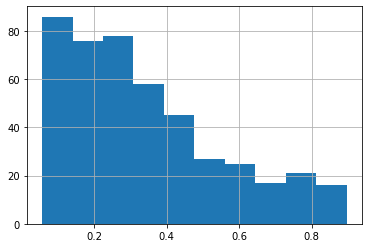

In [57]:
full_demo["nonwhite"] = 1-full_demo["White"]/full_demo["Total"]
full_demo["nonwhite"].hist()

<AxesSubplot:xlabel='nonwhite', ylabel='rv'>

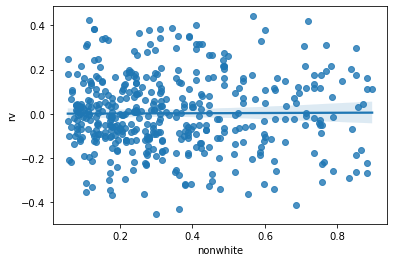

In [59]:
sns.regplot(x='nonwhite', y='rv', data=full_demo)